# Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime as dt


In [2]:
#modificando a exibição de números inteiros
class _IntArrayFormatter(pd.io.formats.format.GenericArrayFormatter):

    def _format_strings(self):
        formatter = self.formatter or (lambda x: ' {:,}'.format(x))
        fmt_values = [formatter(x) for x in self.values]
        return fmt_values

pd.io.formats.format.IntArrayFormatter = _IntArrayFormatter

# Leitura e criação do data frame

In [3]:
df = pd.read_csv('covid_data.csv', sep=',')
df

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5
...,...,...,...,...,...,...,...,...
"23,077",International,2020-02-28,0,0,NaN,NaN,NaN,NaN
"23,078",International,2020-02-29,0,2,NaN,NaN,NaN,NaN
"23,079",International,2020-03-01,0,0,NaN,NaN,NaN,NaN
"23,080",International,2020-03-02,0,0,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    23082 non-null  object 
 1   date                        23082 non-null  object 
 2   new_cases                   23082 non-null  int64  
 3   new_deaths                  23082 non-null  int64  
 4   population                  23018 non-null  float64
 5   aged_65_older_percent       20643 non-null  float64
 6   gdp_per_capita              20711 non-null  float64
 7   hospital_beds_per_thousand  19144 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


#  Análise de Nulos

## Eliminando células vazias

In [5]:
df = df.dropna(axis=0)
df

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,3.892834e+07,2.581,1803.987,0.500
1,Afghanistan,2020-01-01,0,0,3.892834e+07,2.581,1803.987,0.500
2,Afghanistan,2020-01-02,0,0,3.892834e+07,2.581,1803.987,0.500
3,Afghanistan,2020-01-03,0,0,3.892834e+07,2.581,1803.987,0.500
4,Afghanistan,2020-01-04,0,0,3.892834e+07,2.581,1803.987,0.500
...,...,...,...,...,...,...,...,...
"23,013",World,2020-06-06,"133,510","4,784",7.794799e+09,8.696,15469.207,2.705
"23,014",World,2020-06-07,"125,862","3,822",7.794799e+09,8.696,15469.207,2.705
"23,015",World,2020-06-08,"116,318","3,504",7.794799e+09,8.696,15469.207,2.705
"23,016",World,2020-06-09,"105,851","3,230",7.794799e+09,8.696,15469.207,2.705


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18328 entries, 0 to 23017
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    18328 non-null  object 
 1   date                        18328 non-null  object 
 2   new_cases                   18328 non-null  int64  
 3   new_deaths                  18328 non-null  int64  
 4   population                  18328 non-null  float64
 5   aged_65_older_percent       18328 non-null  float64
 6   gdp_per_capita              18328 non-null  float64
 7   hospital_beds_per_thousand  18328 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.3+ MB


## Modificando tipagem

In [7]:
df['date'] = pd.to_datetime(df['date']) #modificando data para date;
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
df.loc[::,'population'] = df.loc[::,'population'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18328 entries, 0 to 23017
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   location                    18328 non-null  object        
 1   date                        18328 non-null  datetime64[ns]
 2   new_cases                   18328 non-null  int64         
 3   new_deaths                  18328 non-null  int64         
 4   population                  18328 non-null  float64       
 5   aged_65_older_percent       18328 non-null  float64       
 6   gdp_per_capita              18328 non-null  float64       
 7   hospital_beds_per_thousand  18328 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 1.3+ MB


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_25048\2123922748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date']) #modificando data para date;


## Melhorando a exibição da contagem de população

In [8]:
df.loc[::,'population'] = df.loc[::,'population'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18328 entries, 0 to 23017
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   location                    18328 non-null  object        
 1   date                        18328 non-null  datetime64[ns]
 2   new_cases                   18328 non-null  int64         
 3   new_deaths                  18328 non-null  int64         
 4   population                  18328 non-null  float64       
 5   aged_65_older_percent       18328 non-null  float64       
 6   gdp_per_capita              18328 non-null  float64       
 7   hospital_beds_per_thousand  18328 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 1.3+ MB


In [9]:
df.describe()

,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
count,18328,"18,328.00","18,328.00","18,328.00","18,328.00","18,328.00","18,328.00"
mean,2020-04-06 16:32:52.064600576,783.96,44.80,"38,452,593.67",10.16,"23,334.48",3.13
min,2019-12-31 00:00:00,"-2,461.00","-1,918.00","-2,147,483,648.00",1.14,661.24,0.10
25%,2020-03-11 00:00:00,0.00,0.00,"3,989,175.00",4.47,"7,485.01",1.38
50%,2020-04-13 00:00:00,6.00,0.00,"10,423,056.00",8.15,"16,277.67",2.60
75%,2020-05-12 00:00:00,98.00,2.00,"40,222,503.00",15.41,"35,220.08",4.21
max,2020-06-10 00:00:00,"133,510.00","10,520.00","1,439,323,774.00",27.05,"116,935.60",13.05
std,NaN,"6,181.71",370.89,"280,829,967.18",6.46,"21,232.14",2.46


## Acrescentando ano, mês e semana a partir da data

In [10]:
df.loc[::,'year'] = df.loc[::,'date'].dt.year
df.loc[::,'month_of_year'] = df.loc[::,'date'].dt.month
df.loc[::,'week_of_year'] = df.loc[::,'date'].dt.isocalendar().week
df.loc[::,'weekday'] = df.loc[::,'date'].dt.weekday
df.loc[::,'day_of_year'] = df.loc[::,'date'].dt.dayofyear
#df['mont_of_yeaer'] = df.
df

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_25048\1187620104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[::,'year'] = df.loc[::,'date'].dt.year
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_25048\1187620104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[::,'month_of_year'] = df.loc[::,'date'].dt.month
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_25048\1187620104.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,year,month_of_year,week_of_year,weekday,day_of_year
0,Afghanistan,2019-12-31,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,019",12,1,1,365
1,Afghanistan,2020-01-01,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,1,2,1
2,Afghanistan,2020-01-02,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,1,3,2
3,Afghanistan,2020-01-03,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,1,4,3
4,Afghanistan,2020-01-04,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"23,013",World,2020-06-06,"133,510","4,784","-2,147,483,648.00",8.70,"15,469.21",2.71,"2,020",6,23,5,158
"23,014",World,2020-06-07,"125,862","3,822","-2,147,483,648.00",8.70,"15,469.21",2.71,"2,020",6,23,6,159
"23,015",World,2020-06-08,"116,318","3,504","-2,147,483,648.00",8.70,"15,469.21",2.71,"2,020",6,24,0,160
"23,016",World,2020-06-09,"105,851","3,230","-2,147,483,648.00",8.70,"15,469.21",2.71,"2,020",6,24,1,161


## Melhorando a exibição e consolicação

### Incluindo mais dados para localização

In [11]:
#é interessante agrupar por continente. Buscar lista e criar coluna de continente.
pais_continente = pd.read_csv(r"C:\Users\Gabriel\Documents\Repositories\Self_owned\Covid_cardio\PRE_TREATMENT\COVID\GEO\countryContinent.csv", encoding='windows-1252', encoding_errors='ignore')
pais_continente

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.00,34.00
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.00,154.00
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.00,39.00
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.00,15.00
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.00,61.00
...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,9.00,61.00
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,2.00,15.00
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,142.00,145.00
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Eastern Africa,2.00,14.00


In [12]:
#verificando quais países estão ausentes na lista importada
import numpy as np

pais_continente.rename(columns={'country' : 'location'}, inplace=True)
country = pais_continente['location'].to_numpy()
location = df['location'].unique()
country

paises_ausentes = np.setdiff1d(location, country, assume_unique=True)
paises_ausentes = pd.Series(paises_ausentes)

#paises ausentes alterados manualmente (foi o que sobrou para fazer)

df = df.merge(pais_continente, how='left', on='location')
df

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,year,month_of_year,...,weekday,day_of_year,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,2019-12-31,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,019",12,...,1,365,AF,AFG,4.00,ISO 3166-2:AF,Asia,Southern Asia,142.00,34.00
1,Afghanistan,2020-01-01,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,...,2,1,AF,AFG,4.00,ISO 3166-2:AF,Asia,Southern Asia,142.00,34.00
2,Afghanistan,2020-01-02,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,...,3,2,AF,AFG,4.00,ISO 3166-2:AF,Asia,Southern Asia,142.00,34.00
3,Afghanistan,2020-01-03,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,...,4,3,AF,AFG,4.00,ISO 3166-2:AF,Asia,Southern Asia,142.00,34.00
4,Afghanistan,2020-01-04,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,...,5,4,AF,AFG,4.00,ISO 3166-2:AF,Asia,Southern Asia,142.00,34.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"18,323",World,2020-06-06,"133,510","4,784","-2,147,483,648.00",8.70,"15,469.21",2.71,"2,020",6,...,5,158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"18,324",World,2020-06-07,"125,862","3,822","-2,147,483,648.00",8.70,"15,469.21",2.71,"2,020",6,...,6,159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"18,325",World,2020-06-08,"116,318","3,504","-2,147,483,648.00",8.70,"15,469.21",2.71,"2,020",6,...,0,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"18,326",World,2020-06-09,"105,851","3,230","-2,147,483,648.00",8.70,"15,469.21",2.71,"2,020",6,...,1,161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df = df.drop(['iso_3166_2','region_code', 'sub_region_code', 'code_2'], axis = 1)
df

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,year,month_of_year,week_of_year,weekday,day_of_year,code_3,country_code,continent,sub_region
0,Afghanistan,2019-12-31,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,019",12,1,1,365,AFG,4.00,Asia,Southern Asia
1,Afghanistan,2020-01-01,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,1,2,1,AFG,4.00,Asia,Southern Asia
2,Afghanistan,2020-01-02,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,1,3,2,AFG,4.00,Asia,Southern Asia
3,Afghanistan,2020-01-03,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,1,4,3,AFG,4.00,Asia,Southern Asia
4,Afghanistan,2020-01-04,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,1,5,4,AFG,4.00,Asia,Southern Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"18,323",World,2020-06-06,"133,510","4,784","-2,147,483,648.00",8.70,"15,469.21",2.71,"2,020",6,23,5,158,NaN,NaN,NaN,NaN
"18,324",World,2020-06-07,"125,862","3,822","-2,147,483,648.00",8.70,"15,469.21",2.71,"2,020",6,23,6,159,NaN,NaN,NaN,NaN
"18,325",World,2020-06-08,"116,318","3,504","-2,147,483,648.00",8.70,"15,469.21",2.71,"2,020",6,24,0,160,NaN,NaN,NaN,NaN
"18,326",World,2020-06-09,"105,851","3,230","-2,147,483,648.00",8.70,"15,469.21",2.71,"2,020",6,24,1,161,NaN,NaN,NaN,NaN


In [14]:
#removendo dados para o mundo, pois o agregado para o mundo será compilado via agregação
mask_world = df['location'] == 'World'
world = df[mask_world]
df = df[~mask_world]
df

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,year,month_of_year,week_of_year,weekday,day_of_year,code_3,country_code,continent,sub_region
0,Afghanistan,2019-12-31,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,019",12,1,1,365,AFG,4.00,Asia,Southern Asia
1,Afghanistan,2020-01-01,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,1,2,1,AFG,4.00,Asia,Southern Asia
2,Afghanistan,2020-01-02,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,1,3,2,AFG,4.00,Asia,Southern Asia
3,Afghanistan,2020-01-03,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,1,4,3,AFG,4.00,Asia,Southern Asia
4,Afghanistan,2020-01-04,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,1,5,4,AFG,4.00,Asia,Southern Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"18,160",Zimbabwe,2020-06-06,28,0,"14,862,927.00",2.82,"1,899.78",1.70,"2,020",6,23,5,158,ZWE,716.00,Africa,Eastern Africa
"18,161",Zimbabwe,2020-06-07,14,0,"14,862,927.00",2.82,"1,899.78",1.70,"2,020",6,23,6,159,ZWE,716.00,Africa,Eastern Africa
"18,162",Zimbabwe,2020-06-08,3,0,"14,862,927.00",2.82,"1,899.78",1.70,"2,020",6,24,0,160,ZWE,716.00,Africa,Eastern Africa
"18,163",Zimbabwe,2020-06-09,5,0,"14,862,927.00",2.82,"1,899.78",1.70,"2,020",6,24,1,161,ZWE,716.00,Africa,Eastern Africa


In [15]:
df.loc[::,'country_code'] = df.loc[::,'country_code'].astype('int')
df

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,year,month_of_year,week_of_year,weekday,day_of_year,code_3,country_code,continent,sub_region
0,Afghanistan,2019-12-31,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,019",12,1,1,365,AFG,4.00,Asia,Southern Asia
1,Afghanistan,2020-01-01,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,1,2,1,AFG,4.00,Asia,Southern Asia
2,Afghanistan,2020-01-02,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,1,3,2,AFG,4.00,Asia,Southern Asia
3,Afghanistan,2020-01-03,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,1,4,3,AFG,4.00,Asia,Southern Asia
4,Afghanistan,2020-01-04,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,1,5,4,AFG,4.00,Asia,Southern Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"18,160",Zimbabwe,2020-06-06,28,0,"14,862,927.00",2.82,"1,899.78",1.70,"2,020",6,23,5,158,ZWE,716.00,Africa,Eastern Africa
"18,161",Zimbabwe,2020-06-07,14,0,"14,862,927.00",2.82,"1,899.78",1.70,"2,020",6,23,6,159,ZWE,716.00,Africa,Eastern Africa
"18,162",Zimbabwe,2020-06-08,3,0,"14,862,927.00",2.82,"1,899.78",1.70,"2,020",6,24,0,160,ZWE,716.00,Africa,Eastern Africa
"18,163",Zimbabwe,2020-06-09,5,0,"14,862,927.00",2.82,"1,899.78",1.70,"2,020",6,24,1,161,ZWE,716.00,Africa,Eastern Africa


# Análise estatística univariada

## New cases

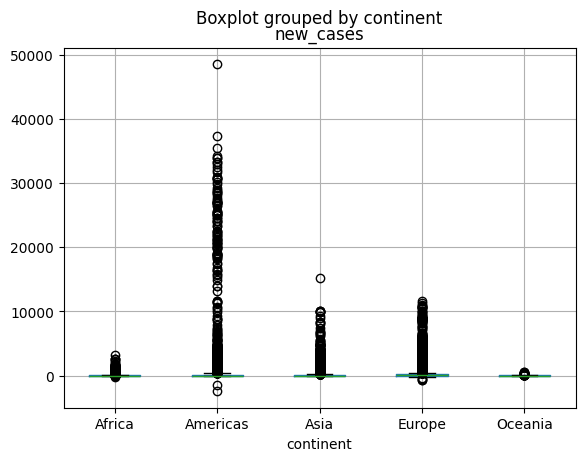

In [16]:
df.boxplot('new_cases', by='continent'); #verificando outliers

In [17]:
#aparecem números de casos negativos. Remover.
mask_negative_cases = df['new_cases'] < 0 #remove casos negativos
df = df[~mask_negative_cases]
mask_negative_deaths = df['new_deaths'] < 0 #remove mortes negativas
df = df[~mask_negative_deaths]
df
df.groupby('location')['new_cases'].sum()
pivot = pd.pivot_table(df, index='location', columns = ('year', 'month_of_year'), values='new_cases', margins = True, aggfunc='sum')
df['population']
df

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,year,month_of_year,week_of_year,weekday,day_of_year,code_3,country_code,continent,sub_region
0,Afghanistan,2019-12-31,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,019",12,1,1,365,AFG,4.00,Asia,Southern Asia
1,Afghanistan,2020-01-01,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,1,2,1,AFG,4.00,Asia,Southern Asia
2,Afghanistan,2020-01-02,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,1,3,2,AFG,4.00,Asia,Southern Asia
3,Afghanistan,2020-01-03,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,1,4,3,AFG,4.00,Asia,Southern Asia
4,Afghanistan,2020-01-04,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,1,5,4,AFG,4.00,Asia,Southern Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"18,160",Zimbabwe,2020-06-06,28,0,"14,862,927.00",2.82,"1,899.78",1.70,"2,020",6,23,5,158,ZWE,716.00,Africa,Eastern Africa
"18,161",Zimbabwe,2020-06-07,14,0,"14,862,927.00",2.82,"1,899.78",1.70,"2,020",6,23,6,159,ZWE,716.00,Africa,Eastern Africa
"18,162",Zimbabwe,2020-06-08,3,0,"14,862,927.00",2.82,"1,899.78",1.70,"2,020",6,24,0,160,ZWE,716.00,Africa,Eastern Africa
"18,163",Zimbabwe,2020-06-09,5,0,"14,862,927.00",2.82,"1,899.78",1.70,"2,020",6,24,1,161,ZWE,716.00,Africa,Eastern Africa


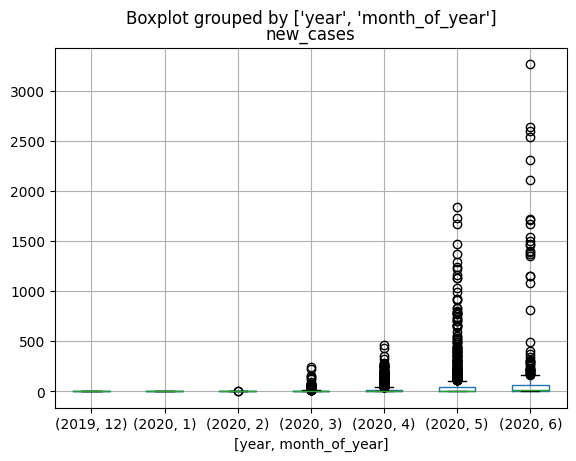

In [18]:
mask_africa = df['continent'] == 'Africa' #máscara de continente
africa = df[mask_africa] #criando um dataframe específico para o continente
africa.boxplot('new_cases', by=['year', 'month_of_year']);

## New Deaths

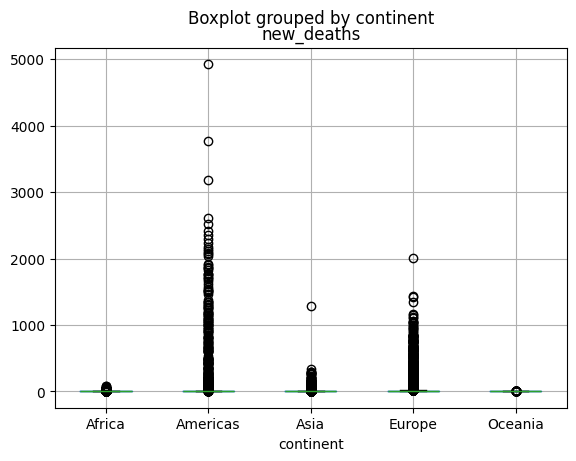

In [19]:
df.boxplot('new_deaths', by='continent'); #verificando outliers

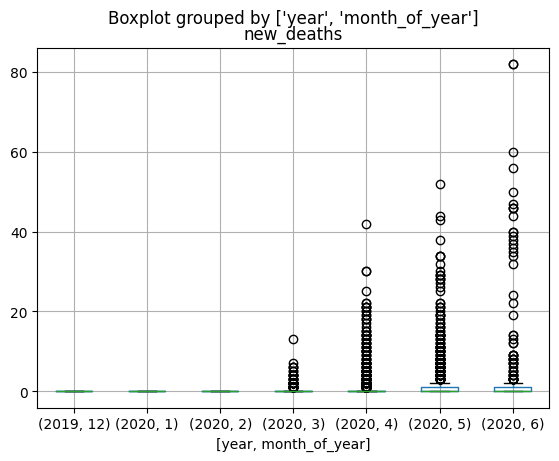

In [20]:
#aparentemente não há mortes negativas. fazer um zoom na África para verificar melhor:
africa.boxplot('new_deaths', by=['year', 'month_of_year']);

## Hospital beds

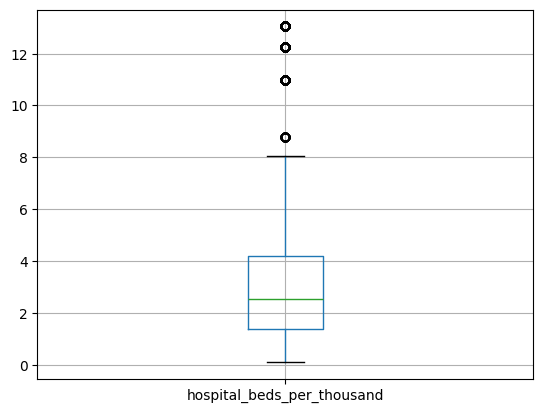

In [21]:
df.boxplot('hospital_beds_per_thousand',return_type='both');

In [22]:
from matplotlib.cbook import boxplot_stats

Returns:
list of dict
A list of dictionaries containing the results for each column of data. Keys of each dictionary are the following:

| Key        | Value Description|
| ---------- |:----------------:| 
| label |tick label for the boxplot|
|mean|arithmetic mean value|
|med|50th percentile|
|q1|first quartile (25th percentile)|
|q3|third quartile (75th percentile)|
|iqr|interquartile range|
|cilo|lower notch around the median|
|cihi|upper notch around the median|
|whislo|end of the lower whisker|
|whishi|end of the upper whisker|
|fliers|outliers|

In [23]:
social_index_stats = boxplot_stats(df['hospital_beds_per_thousand'])
social_index_stats = pd.DataFrame(social_index_stats, index=['social'])
social_index_stats = social_index_stats.drop('fliers', axis = 1)
social_index_stats

,mean,iqr,cilo,cihi,whishi,whislo,q1,med,q3
social,3.13,2.83,2.51,2.57,8.05,0.10,1.38,2.54,4.21


## Elderly population

<Axes: >

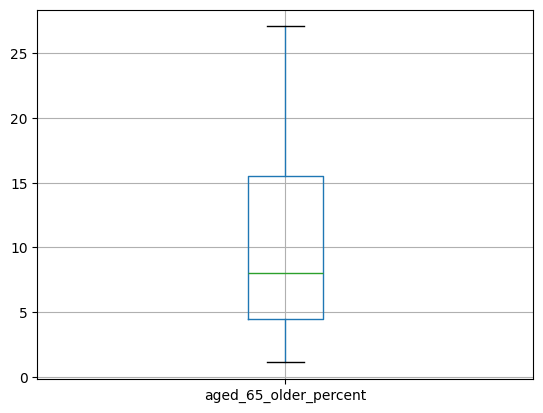

In [24]:
df.boxplot('aged_65_older_percent')

In [25]:
elder_pop_index_stats = boxplot_stats(df['aged_65_older_percent'])
elder_pop_index_stats = pd.DataFrame(elder_pop_index_stats, index=['elder_pop'])
elder_pop_index_stats = elder_pop_index_stats.drop('fliers', axis = 1)
elder_pop_index_stats

,mean,iqr,cilo,cihi,whishi,whislo,q1,med,q3
elder_pop,10.17,11.04,7.87,8.13,27.05,1.14,4.47,8.00,15.50


## GDP per capita

<Axes: >

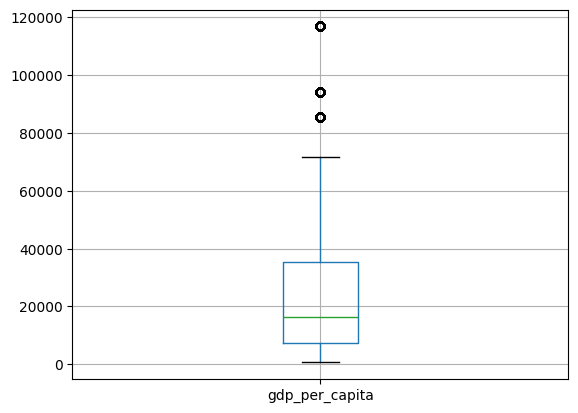

In [26]:
df.boxplot('gdp_per_capita')

In [27]:
economic_index_stats = boxplot_stats(df['gdp_per_capita'])
economic_index_stats = pd.DataFrame(economic_index_stats, index=['gdp_per_capita'])
economic_index_stats = economic_index_stats.drop('fliers', axis = 1)
economic_index_stats

,mean,iqr,cilo,cihi,whishi,whislo,q1,med,q3
gdp_per_capita,"23,407.28","27,735.07","15,954.47","16,600.87","71,809.25",661.24,"7,485.01","16,277.67","35,220.08"


## Population

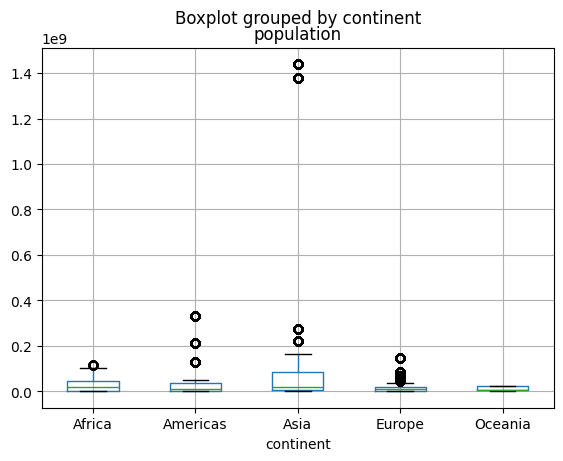

In [28]:
df.boxplot('population', by='continent'); #verificando outliers

# BI: Data Warehouse com Data Lake e SQL Server

Aplicando modelagem estilo banco de dados.

## Identificando os grãos

Qual o meu grão? Isto é, qual a menor entrada registrada em determinado banco de dados?
* Grão -  informação diária por país: número de casos e número de mortes;


## Identificando as dimensões e os indicadores

### Dimensões (como quero medir)

#### Social

* ‰ hosp beds (levels);

#### Elderly population

* % 65+ (levels);

#### Economic

* gdp per capita (levels);

#### Geographic

* continente;
* código do continente;
* sub-região;
* código da sub região;
* código do país;
* identificador do país com 3 letras;
* nome do país;
* atr population;
* atr pib per capita;
* atr ‰ hosp beds/inhab;

#### Time

* dia;
* semana;
* mês;
* ano;
* data no formato AAAA-MM-DD;
* data sequencial (dia 01 = data mais antiga);

### Indicadores (o que quero medir)

* mortes totais;
* casos totais;
* total pop;
* avg hosp beds;
* avg % 65+;
* avg GDP per capita;
* avg pop;
* casos por percentual da população;
* mortes por percentual da população;
* casos por  ‰ hosp beds;
* mortes por  ‰ hosp beds;
* casos por  %65+;
* mortes por %65+;
* casos por GDP per capita;
* mortes por GDP per capita;
* percentual de mortes por casos registrados;
* estatísticas descritivas de todos os indicadores acima (and/or boxplot);

## Identificando os atributos

Quais são as análises mais importantes para a modelagem?

Perguntas que podem ser feitas:

* Número de mortes/casos por faixa de % de idosos?
* Número de mortes/casos por faixa de PIB per capita?
* Número de mortes/casos por faixa de leitos de hospital?
* Número de mortes/casos por período?
* Número de mortes/casos por região do mundo?

## Níveis input

Atributos associados diretamente ao grão, que identificarão o valor específico de um indicador dentro do repositório do banco de dados (ou datawarehouse).

Quando o indicador for incluído no repositório, terá que possuír essas informações como chave primária:

### Social

‰ hosp beds (levels) - discritionary

### Elderly population

% 65+ (levels) - discritionary

### Economic

* gdp per capita (levels) - discritionary

### Geographic

* country ID

### Dimensão temporal

* Sequential data

## Definindo Hierarquias

A identificação da hierarquia não será obtida pela cardinalidade entre atributos e o Nível Input, mas sim pela cardinalidade entre Níveis não Input.

### No Hierarchy possible

It's not possible to define hierarchies for the following dimensions, given they only have one atribute:

* Social;
* Economic;
* Elderly population;

### Geographic

#### Table

![table](geo_hierarchy_table.png)

#### Diagram

![diagram](geo_hierarchy_diagram.png)

### Time

Standardized atributes, input level, hierarchies:

> INPUT level:
>
> -  Identifier: sequential
> 
> Atributos:
> 
> - Dia da semana
> - Data (Dia, mês e ano)
> 
> Hierarquias:
> 
> - Calendário
>     - Níveis: Dia, Mês, Trimestre, Semestre, Ano

## Indexes

### Basic

* mortes totais;
* casos totais;
* total pop;

### Calculated

* avg hosp beds;
* avg % 65+;
* avg GDP per capita;
* avg pop;
* avg cases;
* avg deaths;
* casos por percentual da população;
* mortes por percentual da população;
* casos por  ‰ hosp beds;
* mortes por  ‰ hosp beds;
* casos por  %65+;
* mortes por %65+;
* casos por GDP per capita;
* mortes por GDP per capita;
* percentual de mortes por casos registrados;
* estatísticas descritivas de todos os indicadores acima (and/or boxplot);

### Consolidation

Input indexes are present in the grain. Calculated indexes should not be on input levels. First analysis:

![consolidated_indexes_3.png](consolidated_indexes_3.png)

No changes are needed.

## Dimension x Indexes table

As follows:

![matrix](dim_ind.png)

## Documenting the dimensions

[In this link](https://www.notion.so/distinct-dauphin-143/Turing-1b8754ba9cb64579b3804d13d6bebd2e?pvs=4 "Notion").

## Consolidating the input levels within the social, elder pop. and economic dimensions

Easy option: classify input levels following quartiles:
- min-25%: low;
- 25-50%: low middle;
- 50-75%: high middle;
- 75% and above: high;

In [29]:
stats = [social_index_stats, elder_pop_index_stats, economic_index_stats]
dimension_stats = pd.concat(stats)
dimension_stats


,mean,iqr,cilo,cihi,whishi,whislo,q1,med,q3
social,3.13,2.83,2.51,2.57,8.05,0.10,1.38,2.54,4.21
elder_pop,10.17,11.04,7.87,8.13,27.05,1.14,4.47,8.00,15.50
gdp_per_capita,"23,407.28","27,735.07","15,954.47","16,600.87","71,809.25",661.24,"7,485.01","16,277.67","35,220.08"


In [30]:
dimension_stats.loc['social', 'whislo']

0.1

### Social dimension input levels

In [31]:
def hosp_beds_level_classifier(column_value):
    '''
    Classifies ‰ hospital beds into four levels, based on quartiles:
    FPTH = few hospital beds per thousand inhabitants
    BAPT = bellow average per thousand inhabitants
    AAPT = above average per thousand inhabitants
    MPTH = many hospital beds per thousand inhabitants
    '''
    dimension_row = 'social'

    if column_value < dimension_stats.loc[dimension_row, 'q1']:
        return 'FPTH'
    elif column_value >= dimension_stats.loc[dimension_row, 'q1'] and column_value < dimension_stats.loc[dimension_row, 'med'] :
        return 'BAPT'
    elif column_value >= dimension_stats.loc[dimension_row, 'med'] and column_value < dimension_stats.loc[dimension_row, 'q3']:
        return 'AAPT'
    elif column_value >= dimension_stats.loc[dimension_row, 'q3']:
        return 'MPTH'

In [32]:
hosp_beds_level_classifier(3)

'AAPT'

In [33]:
def hosp_beds_primary_key(column_value):
    '''
    Encoder of ‰hospital bed classes, based on quartiles:
    1 = few hospital beds per thousand inhabitants
    2 = bellow average per thousand inhabitants
    3 = above average per thousand inhabitants
    4 = many hospital beds per thousand inhabitants
    '''
    dimension_row = 'social'

    if column_value < dimension_stats.loc[dimension_row, 'q1']:
        return 1
    elif column_value >= dimension_stats.loc[dimension_row, 'q1'] and column_value < dimension_stats.loc[dimension_row, 'med'] :
        return 2
    elif column_value >= dimension_stats.loc[dimension_row, 'med'] and column_value < dimension_stats.loc[dimension_row, 'q3']:
        return 3
    elif column_value >= dimension_stats.loc[dimension_row, 'q3']:
        return 4

In [34]:
def hosp_beds_descriptor(column_value):
    '''
    Descriptor of ‰hospital bed classes, based on quartiles:
    '''
    dimension_row = 'social'

    if column_value < dimension_stats.loc[dimension_row, 'q1']:
        return 'few hospital beds per thousand inhabitants'
    elif column_value >= dimension_stats.loc[dimension_row, 'q1'] and column_value < dimension_stats.loc[dimension_row, 'med'] :
        return 'bellow average per thousand inhabitants'
    elif column_value >= dimension_stats.loc[dimension_row, 'med'] and column_value < dimension_stats.loc[dimension_row, 'q3']:
        return 'above average per thousand inhabitants'
    elif column_value >= dimension_stats.loc[dimension_row, 'q3']:
        return 'many hospital beds per thousand inhabitants'

### Elder population input levels

In [35]:
def elder_population_level_classifier(column_value):
    '''
    Classifies %65+ into four levels, based on quartiles:
    LOEPL = low elder population level
    BAEPL = bellow average elder population level
    AAEPL = above average elder population level
    HIEPL = high elder population level
    '''
    dimension_row = 'elder_pop'

    if column_value < dimension_stats.loc[dimension_row, 'q1']:
        return 'LOEPL'
    elif column_value >= dimension_stats.loc[dimension_row, 'q1'] and column_value < dimension_stats.loc[dimension_row, 'med'] :
        return 'BAEPL'
    elif column_value >= dimension_stats.loc[dimension_row, 'med'] and column_value < dimension_stats.loc[dimension_row, 'q3']:
        return 'AAEPL'
    elif column_value >= dimension_stats.loc[dimension_row, 'q3']:
        return 'HIEPL'

In [36]:
def elder_pop_primary_key(column_value):
    '''
    Encoder of %65+ levels, based on quartiles:
    1 = low elder population level
    2 = bellow average elder population level
    3 = above average elder population level
    4 = high elder population level
    '''
    dimension_row = 'elder_pop'

    if column_value < dimension_stats.loc[dimension_row, 'q1']:
        return 1
    elif column_value >= dimension_stats.loc[dimension_row, 'q1'] and column_value < dimension_stats.loc[dimension_row, 'med'] :
        return 2
    elif column_value >= dimension_stats.loc[dimension_row, 'med'] and column_value < dimension_stats.loc[dimension_row, 'q3']:
        return 3
    elif column_value >= dimension_stats.loc[dimension_row, 'q3']:
        return 4

In [37]:
def elder_population_level_descriptor(column_value):
    '''
    Descriptor %65+ classes, based on quartiles:
    '''
    dimension_row = 'elder_pop'

    if column_value < dimension_stats.loc[dimension_row, 'q1']:
        return 'low elder population level'
    elif column_value >= dimension_stats.loc[dimension_row, 'q1'] and column_value < dimension_stats.loc[dimension_row, 'med'] :
        return 'bellow average elder population level'
    elif column_value >= dimension_stats.loc[dimension_row, 'med'] and column_value < dimension_stats.loc[dimension_row, 'q3']:
        return 'above average elder population level'
    elif column_value >= dimension_stats.loc[dimension_row, 'q3']:
        return 'high elder population level'

In [38]:
elder_population_level_descriptor(3)

'low elder population level'

### Economic dimension input levels

In [39]:
def gdp_level_classifier(column_value):
    '''
    Classifies gdp per capita data into four levels, based on quartiles:
    LOW = low income
    MLO = middle-low income
    MHI = middle-high income
    HIG = high income
    '''
    dimension_row = 'gdp_per_capita'

    if column_value < dimension_stats.loc[dimension_row, 'q1']:
        return 'LOW'
    elif column_value >= dimension_stats.loc[dimension_row, 'q1'] and column_value < dimension_stats.loc[dimension_row, 'med'] :
        return 'MLO'
    elif column_value >= dimension_stats.loc[dimension_row, 'med'] and column_value < dimension_stats.loc[dimension_row, 'q3']:
        return 'MHI'
    elif column_value >= dimension_stats.loc[dimension_row, 'q3']:
        return 'HIG'

In [40]:
gdp_level_classifier(20000)

'MHI'

In [41]:
def gdp_level_primary_key(column_value):
    '''
    Encoder of gdp per capita levels, based on quartiles:
    1 = low income
    2 = middle-low income
    3 = middle-high income
    4 = high income
    '''
    dimension_row = 'gdp_per_capita'

    if column_value < dimension_stats.loc[dimension_row, 'q1']:
        return 1
    elif column_value >= dimension_stats.loc[dimension_row, 'q1'] and column_value < dimension_stats.loc[dimension_row, 'med'] :
        return 2
    elif column_value >= dimension_stats.loc[dimension_row, 'med'] and column_value < dimension_stats.loc[dimension_row, 'q3']:
        return 3
    elif column_value >= dimension_stats.loc[dimension_row, 'q3']:
        return 4

In [42]:
def gdp_level_descriptor(column_value):
    '''
    Descriptor of gdp per capita levels, based on quartiles
    '''
    dimension_row = 'gdp_per_capita'

    if column_value < dimension_stats.loc[dimension_row, 'q1']:
        return 'low income'
    elif column_value >= dimension_stats.loc[dimension_row, 'q1'] and column_value < dimension_stats.loc[dimension_row, 'med']:
        return 'middle-low income'
    elif column_value >= dimension_stats.loc[dimension_row, 'med'] and column_value < dimension_stats.loc[dimension_row, 'q3']:
        return 'middle-high income'
    elif column_value >= dimension_stats.loc[dimension_row, 'q3']:
        return 'high income'

In [43]:
df['gdp_per_capita'] = df['gdp_per_capita'].astype('float')
df['hospital_beds_per_thousand'] = df['hospital_beds_per_thousand'].astype('float')
#classifying
df['hosp_level_natural_id'] = df['hospital_beds_per_thousand'].apply(lambda x: hosp_beds_level_classifier(x))
df['gdp_level_natural_id'] = df['gdp_per_capita'].apply(lambda x: gdp_level_classifier(x))
df['elder_pop_level_natural_id'] = df['aged_65_older_percent'].apply(lambda x: elder_population_level_classifier(x))
#encoding
df['hosp_level_pk'] = df['hospital_beds_per_thousand'].apply(lambda x: hosp_beds_primary_key(x))
df['gdp_level_pk'] = df['gdp_per_capita'].apply(lambda x: gdp_level_primary_key(x))
df['elder_pop_lvl_pk'] = df['aged_65_older_percent'].apply(lambda x: elder_pop_primary_key(x))
df['hosp_level_pk'] = df['hosp_level_pk'].astype('int')
df['gdp_level_pk'] = df['gdp_level_pk'].astype('int')
df['elder_pop_lvl_pk'] = df['elder_pop_lvl_pk'].astype('int')
#describing
df['hosp_level_desc'] = df['hospital_beds_per_thousand'].apply(lambda x: hosp_beds_descriptor(x))
df['gdp_level_desc'] = df['gdp_per_capita'].apply(lambda x: gdp_level_descriptor(x))
df['elder_pop_lvl_desc'] = df['aged_65_older_percent'].apply(lambda x: elder_population_level_descriptor(x))
df

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,year,month_of_year,...,sub_region,hosp_level_natural_id,gdp_level_natural_id,elder_pop_level_natural_id,hosp_level_pk,gdp_level_pk,elder_pop_lvl_pk,hosp_level_desc,gdp_level_desc,elder_pop_lvl_desc
0,Afghanistan,2019-12-31,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,019",12,...,Southern Asia,FPTH,LOW,LOEPL,1,1,1,few hospital beds per thousand inhabitants,low income,low elder population level
1,Afghanistan,2020-01-01,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,...,Southern Asia,FPTH,LOW,LOEPL,1,1,1,few hospital beds per thousand inhabitants,low income,low elder population level
2,Afghanistan,2020-01-02,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,...,Southern Asia,FPTH,LOW,LOEPL,1,1,1,few hospital beds per thousand inhabitants,low income,low elder population level
3,Afghanistan,2020-01-03,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,...,Southern Asia,FPTH,LOW,LOEPL,1,1,1,few hospital beds per thousand inhabitants,low income,low elder population level
4,Afghanistan,2020-01-04,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,...,Southern Asia,FPTH,LOW,LOEPL,1,1,1,few hospital beds per thousand inhabitants,low income,low elder population level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"18,160",Zimbabwe,2020-06-06,28,0,"14,862,927.00",2.82,"1,899.78",1.70,"2,020",6,...,Eastern Africa,BAPT,LOW,LOEPL,2,1,1,bellow average per thousand inhabitants,low income,low elder population level
"18,161",Zimbabwe,2020-06-07,14,0,"14,862,927.00",2.82,"1,899.78",1.70,"2,020",6,...,Eastern Africa,BAPT,LOW,LOEPL,2,1,1,bellow average per thousand inhabitants,low income,low elder population level
"18,162",Zimbabwe,2020-06-08,3,0,"14,862,927.00",2.82,"1,899.78",1.70,"2,020",6,...,Eastern Africa,BAPT,LOW,LOEPL,2,1,1,bellow average per thousand inhabitants,low income,low elder population level
"18,163",Zimbabwe,2020-06-09,5,0,"14,862,927.00",2.82,"1,899.78",1.70,"2,020",6,...,Eastern Africa,BAPT,LOW,LOEPL,2,1,1,bellow average per thousand inhabitants,low income,low elder population level


## Encoding continent and sub region labels

Given that the data set is static (i.e. will not be updated), the encoding is going to be perfomed via label enconders instead of using the lookup method.

In [44]:
df['country_code'] = df['country_code'].astype('int')

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [46]:
sub_regions = df['sub_region'].unique()
sub_regions

array(['Southern Asia', 'Southern Europe', 'Northern Africa', 'Caribbean',
       'South America', 'Western Asia', 'Australia and New Zealand',
       'Western Europe', 'Eastern Europe', 'Central America',
       'Western Africa', 'Southern Africa', 'South-Eastern Asia',
       'Eastern Africa', 'Middle Africa', 'Northern America',
       'Eastern Asia', 'Northern Europe', 'Melanesia', 'Central Asia'],
      dtype=object)

In [47]:
continents = df['continent'].unique()
continents

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [48]:
sub_regions_id = le.fit_transform(sub_regions)
sub_regions_id

array([15, 16,  9,  1, 12, 18,  0, 19,  6,  2, 17, 14, 13,  4,  8, 10,  5,
       11,  7,  3])

In [49]:
continents_id = le.fit_transform(continents)
continents_id

array([2, 3, 0, 1, 4])

In [50]:
df['sub_regions_id'] = le.fit_transform(df['sub_region'])
df['continent_id'] = le.fit_transform(df['continent'])
df

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,year,month_of_year,...,gdp_level_natural_id,elder_pop_level_natural_id,hosp_level_pk,gdp_level_pk,elder_pop_lvl_pk,hosp_level_desc,gdp_level_desc,elder_pop_lvl_desc,sub_regions_id,continent_id
0,Afghanistan,2019-12-31,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,019",12,...,LOW,LOEPL,1,1,1,few hospital beds per thousand inhabitants,low income,low elder population level,15,2
1,Afghanistan,2020-01-01,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,...,LOW,LOEPL,1,1,1,few hospital beds per thousand inhabitants,low income,low elder population level,15,2
2,Afghanistan,2020-01-02,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,...,LOW,LOEPL,1,1,1,few hospital beds per thousand inhabitants,low income,low elder population level,15,2
3,Afghanistan,2020-01-03,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,...,LOW,LOEPL,1,1,1,few hospital beds per thousand inhabitants,low income,low elder population level,15,2
4,Afghanistan,2020-01-04,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,...,LOW,LOEPL,1,1,1,few hospital beds per thousand inhabitants,low income,low elder population level,15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"18,160",Zimbabwe,2020-06-06,28,0,"14,862,927.00",2.82,"1,899.78",1.70,"2,020",6,...,LOW,LOEPL,2,1,1,bellow average per thousand inhabitants,low income,low elder population level,4,0
"18,161",Zimbabwe,2020-06-07,14,0,"14,862,927.00",2.82,"1,899.78",1.70,"2,020",6,...,LOW,LOEPL,2,1,1,bellow average per thousand inhabitants,low income,low elder population level,4,0
"18,162",Zimbabwe,2020-06-08,3,0,"14,862,927.00",2.82,"1,899.78",1.70,"2,020",6,...,LOW,LOEPL,2,1,1,bellow average per thousand inhabitants,low income,low elder population level,4,0
"18,163",Zimbabwe,2020-06-09,5,0,"14,862,927.00",2.82,"1,899.78",1.70,"2,020",6,...,LOW,LOEPL,2,1,1,bellow average per thousand inhabitants,low income,low elder population level,4,0


In [51]:
df[mask_africa]

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,year,month_of_year,...,gdp_level_natural_id,elder_pop_level_natural_id,hosp_level_pk,gdp_level_pk,elder_pop_lvl_pk,hosp_level_desc,gdp_level_desc,elder_pop_lvl_desc,sub_regions_id,continent_id
247,Algeria,2019-12-31,0,0,"43,851,043.00",6.21,"13,913.84",1.90,"2,019",12,...,MLO,BAEPL,2,2,2,bellow average per thousand inhabitants,middle-low income,bellow average elder population level,9,0
248,Algeria,2020-01-01,0,0,"43,851,043.00",6.21,"13,913.84",1.90,"2,020",1,...,MLO,BAEPL,2,2,2,bellow average per thousand inhabitants,middle-low income,bellow average elder population level,9,0
249,Algeria,2020-01-02,0,0,"43,851,043.00",6.21,"13,913.84",1.90,"2,020",1,...,MLO,BAEPL,2,2,2,bellow average per thousand inhabitants,middle-low income,bellow average elder population level,9,0
250,Algeria,2020-01-03,0,0,"43,851,043.00",6.21,"13,913.84",1.90,"2,020",1,...,MLO,BAEPL,2,2,2,bellow average per thousand inhabitants,middle-low income,bellow average elder population level,9,0
251,Algeria,2020-01-04,0,0,"43,851,043.00",6.21,"13,913.84",1.90,"2,020",1,...,MLO,BAEPL,2,2,2,bellow average per thousand inhabitants,middle-low income,bellow average elder population level,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"18,160",Zimbabwe,2020-06-06,28,0,"14,862,927.00",2.82,"1,899.78",1.70,"2,020",6,...,LOW,LOEPL,2,1,1,bellow average per thousand inhabitants,low income,low elder population level,4,0
"18,161",Zimbabwe,2020-06-07,14,0,"14,862,927.00",2.82,"1,899.78",1.70,"2,020",6,...,LOW,LOEPL,2,1,1,bellow average per thousand inhabitants,low income,low elder population level,4,0
"18,162",Zimbabwe,2020-06-08,3,0,"14,862,927.00",2.82,"1,899.78",1.70,"2,020",6,...,LOW,LOEPL,2,1,1,bellow average per thousand inhabitants,low income,low elder population level,4,0
"18,163",Zimbabwe,2020-06-09,5,0,"14,862,927.00",2.82,"1,899.78",1.70,"2,020",6,...,LOW,LOEPL,2,1,1,bellow average per thousand inhabitants,low income,low elder population level,4,0



## Generating primary key for time dimension

In [52]:
df['day_id'] = df['date'].apply(lambda x: x.toordinal())
df

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,year,month_of_year,...,elder_pop_level_natural_id,hosp_level_pk,gdp_level_pk,elder_pop_lvl_pk,hosp_level_desc,gdp_level_desc,elder_pop_lvl_desc,sub_regions_id,continent_id,day_id
0,Afghanistan,2019-12-31,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,019",12,...,LOEPL,1,1,1,few hospital beds per thousand inhabitants,low income,low elder population level,15,2,"737,424"
1,Afghanistan,2020-01-01,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,...,LOEPL,1,1,1,few hospital beds per thousand inhabitants,low income,low elder population level,15,2,"737,425"
2,Afghanistan,2020-01-02,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,...,LOEPL,1,1,1,few hospital beds per thousand inhabitants,low income,low elder population level,15,2,"737,426"
3,Afghanistan,2020-01-03,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,...,LOEPL,1,1,1,few hospital beds per thousand inhabitants,low income,low elder population level,15,2,"737,427"
4,Afghanistan,2020-01-04,0,0,"38,928,341.00",2.58,"1,803.99",0.50,"2,020",1,...,LOEPL,1,1,1,few hospital beds per thousand inhabitants,low income,low elder population level,15,2,"737,428"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"18,160",Zimbabwe,2020-06-06,28,0,"14,862,927.00",2.82,"1,899.78",1.70,"2,020",6,...,LOEPL,2,1,1,bellow average per thousand inhabitants,low income,low elder population level,4,0,"737,582"
"18,161",Zimbabwe,2020-06-07,14,0,"14,862,927.00",2.82,"1,899.78",1.70,"2,020",6,...,LOEPL,2,1,1,bellow average per thousand inhabitants,low income,low elder population level,4,0,"737,583"
"18,162",Zimbabwe,2020-06-08,3,0,"14,862,927.00",2.82,"1,899.78",1.70,"2,020",6,...,LOEPL,2,1,1,bellow average per thousand inhabitants,low income,low elder population level,4,0,"737,584"
"18,163",Zimbabwe,2020-06-09,5,0,"14,862,927.00",2.82,"1,899.78",1.70,"2,020",6,...,LOEPL,2,1,1,bellow average per thousand inhabitants,low income,low elder population level,4,0,"737,585"


## Generating dimension tables

In [53]:
df.columns

Index(['location', 'date', 'new_cases', 'new_deaths', 'population',
       'aged_65_older_percent', 'gdp_per_capita', 'hospital_beds_per_thousand',
       'year', 'month_of_year', 'week_of_year', 'weekday', 'day_of_year',
       'code_3', 'country_code', 'continent', 'sub_region',
       'hosp_level_natural_id', 'gdp_level_natural_id',
       'elder_pop_level_natural_id', 'hosp_level_pk', 'gdp_level_pk',
       'elder_pop_lvl_pk', 'hosp_level_desc', 'gdp_level_desc',
       'elder_pop_lvl_desc', 'sub_regions_id', 'continent_id', 'day_id'],
      dtype='object')

In [54]:
table_economic_dimension = df[['gdp_level_natural_id', 'gdp_level_pk', 'gdp_level_desc']].drop_duplicates()
table_economic_dimension

,gdp_level_natural_id,gdp_level_pk,gdp_level_desc
0,LOW,1,low income
153,MLO,2,middle-low income
405,MHI,3,middle-high income
738,HIG,4,high income


In [55]:
table_economic_dimension.to_csv('economic_dimension.csv', sep=';', encoding='utf-8')

In [56]:
table_social_dimension = df[['hosp_level_pk', 'hosp_level_natural_id', 'hosp_level_desc']].drop_duplicates()
table_social_dimension

,hosp_level_pk,hosp_level_natural_id,hosp_level_desc
0,1,FPTH,few hospital beds per thousand inhabitants
153,3,AAPT,above average per thousand inhabitants
247,2,BAPT,bellow average per thousand inhabitants
488,4,MPTH,many hospital beds per thousand inhabitants


In [57]:
table_social_dimension.to_csv('social_dimension.csv', sep=';', encoding='utf-8')

In [58]:
table_elder_pop_dimension = df[['elder_pop_lvl_pk', 'elder_pop_level_natural_id', 'elder_pop_lvl_desc']].drop_duplicates()
table_elder_pop_dimension

,elder_pop_lvl_pk,elder_pop_level_natural_id,elder_pop_lvl_desc
0,1,LOEPL,low elder population level
153,3,AAEPL,above average elder population level
247,2,BAEPL,bellow average elder population level
738,4,HIEPL,high elder population level


In [59]:
table_elder_pop_dimension.to_csv('elder_pop_dimension.csv', sep=';', encoding='utf-8')

In [60]:
table_geo_dim = df[['country_code', 'code_3', 'location', 'sub_regions_id', 'sub_region', 'continent_id', 'continent', 'population',
       'aged_65_older_percent', 'gdp_per_capita', 'hospital_beds_per_thousand']].drop_duplicates()
table_geo_dim

,country_code,code_3,location,sub_regions_id,sub_region,continent_id,continent,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,4,AFG,Afghanistan,15,Southern Asia,2,Asia,"38,928,341.00",2.58,"1,803.99",0.50
153,8,ALB,Albania,16,Southern Europe,3,Europe,"2,877,800.00",13.19,"11,803.43",2.89
247,12,DZA,Algeria,9,Northern Africa,0,Africa,"43,851,043.00",6.21,"13,913.84",1.90
405,28,ATG,Antigua and Barbuda,1,Caribbean,1,Americas,"97,928.00",6.93,"21,490.94",3.80
488,32,ARG,Argentina,12,South America,1,Americas,"45,195,777.00",11.20,"18,933.91",5.00
...,...,...,...,...,...,...,...,...,...,...,...
"17,686",862,VEN,Venezuela,12,South America,1,Americas,"28,435,943.00",6.61,"16,745.02",0.80
"17,774",704,VNM,Vietnam,13,South-Eastern Asia,2,Asia,"97,338,583.00",7.15,"6,171.88",2.60
"17,937",887,YEM,Yemen,18,Western Asia,2,Asia,"29,825,968.00",2.92,"1,479.15",0.70
"17,999",894,ZMB,Zambia,4,Eastern Africa,0,Africa,"18,383,956.00",2.48,"3,689.25",2.00


In [61]:
table_geo_dim.to_csv('geo_dimension.csv', sep=';', encoding='utf-8')

In [69]:
table_time_dim = df[['day_id', 'date']].drop_duplicates()
table_time_dim

,day_id,date
0,"737,424",2019-12-31
1,"737,425",2020-01-01
2,"737,426",2020-01-02
3,"737,427",2020-01-03
4,"737,428",2020-01-04
...,...,...
310,"737,488",2020-03-04
311,"737,489",2020-03-05
312,"737,490",2020-03-06
490,"737,491",2020-03-07


In [70]:
table_time_dim.to_csv('time_dimension.csv', sep=';', encoding='utf-8')

In [71]:
df.to_csv('tratado_covid_data.csv', sep=';', encoding='utf-8')

## Generating fact table

In [67]:
table_fact = df[['gdp_level_pk', 'country_code', 'day_id', 'hosp_level_pk', 'elder_pop_lvl_pk', 'new_cases', 'new_deaths']]
table_fact

,gdp_level_pk,country_code,day_id,hosp_level_pk,elder_pop_lvl_pk,new_cases,new_deaths
0,1,4,"737,424",1,1,0,0
1,1,4,"737,425",1,1,0,0
2,1,4,"737,426",1,1,0,0
3,1,4,"737,427",1,1,0,0
4,1,4,"737,428",1,1,0,0
...,...,...,...,...,...,...,...
"18,160",1,716,"737,582",2,1,28,0
"18,161",1,716,"737,583",2,1,14,0
"18,162",1,716,"737,584",2,1,3,0
"18,163",1,716,"737,585",2,1,5,0


In [68]:
table_fact.to_csv('table_fact.csv', sep=';', encoding='utf-8')